## Начало 

Проверим точность MobileNet V2.

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pickle
import methods

Зададим место, где лежат файлы.

In [11]:
DATA_FOLDER = "data"
CATEGORY_1 = "cat"
CATEGORY_2 = "dog"

## Взглянем на данные 

cat training data length:  7999
dog training data length:  7999
cat validation data length:  2001
dog validation data length:  2001
cat test data length:  2499
dog test data length:  2499


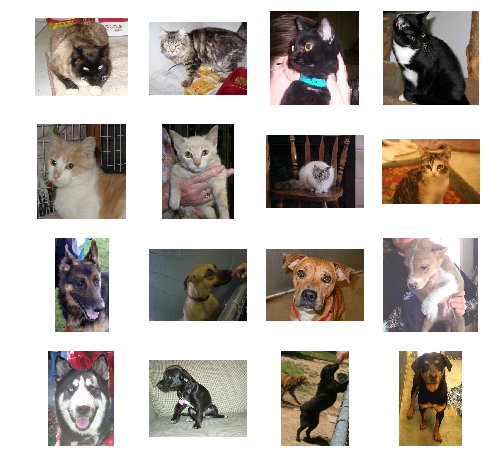

In [12]:
methods.visualize_data(DATA_FOLDER, CATEGORY_1, CATEGORY_2)

## Подготовим данные

In [13]:
image_size = 160 # All images will be resized to 150x150
batch_size = 4

train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
        DATA_FOLDER + '/train',
        target_size = (image_size, image_size),
        batch_size = batch_size,
        class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
        DATA_FOLDER + '/validation',
        target_size = (image_size, image_size),
        batch_size = batch_size,
        class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
        DATA_FOLDER + '/test',
        target_size = (image_size, image_size),
        batch_size = batch_size,
        shuffle=False,
        class_mode = "binary"
)

Found 15998 images belonging to 2 classes.
Found 4002 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


## Построим и обучим модель 

In [14]:
IMG_SHAPE = (image_size, image_size, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [15]:
base_model.trainable = False

In [16]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalizationV1) (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [17]:
model = tf.keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [20]:
epochs = 2
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

In [21]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch = steps_per_epoch,
      epochs = epochs,
      workers = 4,
      validation_data = validation_generator,
      validation_steps = validation_steps)

Epoch 1/2
 159/4000 [>.............................] - ETA: 4:45 - loss: 0.6265 - acc: 0.6557

D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffIma

1399/4000 [=========>....................] - ETA: 2:58 - loss: 0.4629 - acc: 0.7868

D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:780: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


2829/4000 [====================>.........] - ETA: 1:19 - loss: 0.4115 - acc: 0.8136- ETA: 1 

D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307363840 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307888128 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 328728576 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 5357. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\

 137/1001 [===>..........................] - ETA: 46s - loss: 0.1829 - acc: 0.9343 ETA: 52 - ETA: 47s - loss: 0.1818 - acc

D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: Us

 960/1001 [===========================>..] - ETA: 1s - loss: 0.1769 - acc: 0.9424

D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 209715200 bytes but only got 0. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 52428800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6468665344 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 7027. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\

4000/4000 [==============================] - 320s 80ms/step - loss: 0.3973 - acc: 0.8187 - val_loss: 0.1755 - val_acc: 0.9433
Epoch 2/2
4000/4000 [==============================] - 294s 73ms/step - loss: 0.3279 - acc: 0.8516 - val_loss: 0.1473 - val_acc: 0.9518


## Fine-tuning 

In [30]:
base_model.trainable = True

In [31]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

Number of layers in the base model:  155


In [32]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,863,873
Non-trainable params: 395,392
_________________________________________________________________


In [34]:
history_fine = model.fit_generator(train_generator,
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs,
                                   workers=4,
                                   validation_data=validation_generator,
                                   validation_steps=validation_steps)

Epoch 1/2
4000/4000 [==============================] - 296s 74ms/step - loss: 0.2586 - acc: 0.8918 - val_loss: 0.0861 - val_acc: 0.9685
Epoch 2/2
4000/4000 [==============================] - 288s 72ms/step - loss: 0.1253 - acc: 0.9518 - val_loss: 0.0633 - val_acc: 0.9770


##  Сохраним результаты

Сохраним модель.

In [35]:
model.save("models/mobileNetV2/mobileNetV2.h5")

In [36]:
saved_model_path = "models/mobileNetV2/"
tf.contrib.saved_model.save_keras_model(model, saved_model_path)


Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: models/mobileNetV2/1563491295\saved_model.pb


b'models/mobileNetV2/1563491295'

Сохраним историю обучения.

In [37]:
with open("histories/mobileNetV2/mobileNetV2History", 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Сохраним историю fine-tuning обучения.

In [38]:
with open("histories/mobileNetV2/mobileNetV2HistoryFine", 'wb') as file_pi:
    pickle.dump(history_fine.history, file_pi)

## Восстановим результаты 

Восстановим модель.

In [39]:
model_loaded = keras.models.load_model("models/mobileNetV2/mobileNetV2.h5")

Восстановим историю обучения.

In [40]:
with open("histories/mobileNetV2/mobileNetV2History", 'rb') as file_pi:
    history_loaded = pickle.load(file_pi)

Восстановим историю fine-tuning обучения.

In [41]:
with open("histories/mobileNetV2/mobileNetV2HistoryFine", 'rb') as file_pi:
    history_loaded_fine = pickle.load(file_pi)

## Посмотрим результаты 

Посмотрим графики обучения.

In [42]:
acc = history_loaded['acc']
val_acc = history_loaded['val_acc']
loss = history_loaded['loss']
val_loss = history_loaded['val_loss']

In [43]:
acc += history_loaded_fine['acc']
val_acc += history_loaded_fine['val_acc']

loss += history_loaded_fine['loss']
val_loss += history_loaded_fine['val_loss']

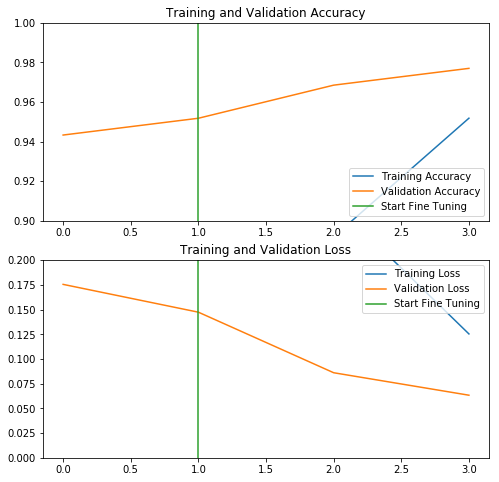

In [44]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.9, 1])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 0.2])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Оценим параметры модели.

In [45]:
# Calculating accuracy, precision, recall, f1 score.
def AccRecPrec(predictions, test_labels):

    x = tf.placeholder(tf.int32, )
    y = tf.placeholder(tf.int32, )
    acc, acc_op = tf.metrics.accuracy(labels=x, predictions=y)
    rec, rec_op = tf.metrics.recall(labels=x, predictions=y)
    pre, pre_op = tf.metrics.precision(labels=x, predictions=y)
    f1,  f1_op  = tf.contrib.metrics.f1_score(labels=x, predictions=y)

    def f(x):
        if (x>0.5):
            return 1
        else:
            return 0
        
    predictions = np.array(list(map(f, predictions)))

    sess=tf.Session()
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    v = sess.run(acc_op, feed_dict={x: test_labels,y: predictions}) # Accuracy.
    r = sess.run(rec_op, feed_dict={x: test_labels,y: predictions}) # Recall.
    p = sess.run(pre_op, feed_dict={x: test_labels,y: predictions}) # Precision.
    f = sess.run(f1_op,  feed_dict={x: test_labels,y: predictions}) # F1.

    print("accuracy: ", v)
    print("recall:   ", r)
    print("precision:", p)
    print("f1:       ", 2*p*r/(p+r))

In [46]:
AccRecPrec(model_loaded.predict_generator(test_generator), test_generator.classes)

D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262146 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262151 bytes but only got 0. Skipping tag 56
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:780: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
D:\Programms\Anaconda3\envs\tf_gpu\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF d

accuracy:  0.97839135
recall:    0.9891957
precision: 0.9682726
f1:        0.9786223734465836
